In [ ]:
from ultralytics import YOLO
import cv2
import os

model = YOLO("runs/detect/cheek_chin_yolov8_skin/weights/best.pt")

img_path = "D:/KLTN/FINAL_SKINTONE/test4/0c4e7473e7e82503bf1dc2d2328112a6.jpg"
results = model(img_path, conf=0.5)[0]

# Đọc ảnh gốc
image = cv2.imread(img_path)

# Duyệt qua từng box
for i, box in enumerate(results.boxes.xyxy):
    cls_id = int(results.boxes.cls[i])
    label = model.names[cls_id]  # VD: "left_cheek", "chin", "right_cheek"
    x1, y1, x2, y2 = map(int, box)
    crop = image[y1:y2, x1:x2]
    cv2.imwrite(f"output_crop/{label}_{i}.jpg", crop)

C:\Users\admin1\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


image 1/1 D:\KLTN\FINAL_SKINTONE\test4\0c4e7473e7e82503bf1dc2d2328112a6.jpg: 640x544 1 chin, 1 left, 1 right, 60.4ms
Speed: 5.3ms preprocess, 60.4ms inference, 121.4ms postprocess per image at shape (1, 3, 640, 544)


In [ ]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm
import torch

# =================== Cấu hình đường dẫn ===================
model_path = "runs/detect/cheek_chin_yolov8_skin/weights/best.pt"  # đường dẫn đến mô hình YOLOv8 đã huấn luyện
input_folder = "test4"  # thư mục chứa ảnh đầu vào
output_folder = "output"  # thư mục lưu ảnh vùng được chọn

# =================== Load model ===================
model = YOLO(model_path)

# =================== Hàm tính độ sáng ===================
def compute_brightness(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return hsv[..., 2].mean()

# =================== Tạo thư mục nếu chưa có ===================
os.makedirs(output_folder, exist_ok=True)

# =================== Duyệt qua từng ảnh ===================
image_paths = [os.path.join(input_folder, f) for f in os.listdir(input_folder)
               if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_path in tqdm(image_paths, desc="🔍 Đang xử lý ảnh"):
    image = cv2.imread(img_path)
    if image is None:
        print(f"❌ Không đọc được ảnh: {img_path}")
        continue

    # ======= Phát hiện các vùng má/cằm =======
    results = model(image)[0]
    names = model.names

    regions = {}  # lưu vùng theo tên lớp
    for box in results.boxes:
        cls_id = int(box.cls[0])
        cls_name = names[cls_id]
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = image[y1:y2, x1:x2]

        if cls_name in ['left', 'right', 'chin']:
            regions[cls_name] = crop

    if not regions:
        print(f"⚠️ Không phát hiện được vùng nào trong ảnh {os.path.basename(img_path)} (ảnh nghiêng hoặc bị che).")
        continue

    # ======= Tính độ sáng và chọn vùng sáng nhất =======
    brightness_scores = {k: compute_brightness(v) for k, v in regions.items()}
    best_region = max(brightness_scores, key=brightness_scores.get)
    selected_crop = regions[best_region]

    # ======= Lưu vùng được chọn =======
    save_path = os.path.join(output_folder, os.path.basename(img_path))
    cv2.imwrite(save_path, selected_crop)
    print(f"✅ Ảnh {os.path.basename(img_path)}: chọn vùng '{best_region}' (độ sáng: {brightness_scores[best_region]:.2f})")


🔍 Đang xử lý ảnh:   0%|          | 0/14 [00:00<?, ?it/s]


0: 640x544 1 chin, 1 left, 1 right, 15.7ms
Speed: 5.9ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


🔍 Đang xử lý ảnh:   7%|▋         | 1/14 [00:00<00:04,  2.78it/s]

✅ Ảnh 0c4e7473e7e82503bf1dc2d2328112a6.jpg: chọn vùng 'chin' (độ sáng: 219.21)

0: 640x480 1 chin, 1 left, 1 right, 77.9ms
Speed: 4.5ms preprocess, 77.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


🔍 Đang xử lý ảnh:  14%|█▍        | 2/14 [00:00<00:02,  4.55it/s]

✅ Ảnh 223ce0cd26dec68747477fba9bf01a97.jpg: chọn vùng 'right' (độ sáng: 239.35)

0: 640x640 1 chin, 1 left, 2 rights, 10.2ms
Speed: 5.9ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
✅ Ảnh 28428ec47d3ce47e4fb2b2726d7a2293.jpg: chọn vùng 'chin' (độ sáng: 199.06)

0: 640x512 1 chin, 1 left, 1 right, 83.5ms
Speed: 3.5ms preprocess, 83.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


🔍 Đang xử lý ảnh:  29%|██▊       | 4/14 [00:00<00:01,  7.47it/s]

✅ Ảnh 359a40ffdbf62134c69151d3ec304c99.jpg: chọn vùng 'right' (độ sáng: 210.95)

0: 640x640 1 chin, 2 lefts, 1 right, 16.5ms
Speed: 4.3ms preprocess, 16.5ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)
✅ Ảnh 4fa62d5d64dd7772277d1336ca4b4618.jpg: chọn vùng 'chin' (độ sáng: 195.52)

0: 640x512 1 chin, 1 left, 1 right, 10.2ms
Speed: 4.8ms preprocess, 10.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 512)


🔍 Đang xử lý ảnh:  43%|████▎     | 6/14 [00:00<00:00, 10.57it/s]

✅ Ảnh 5d7a218bf5bc9fc6a02d3a2b22f5dbca.jpg: chọn vùng 'right' (độ sáng: 235.66)

0: 640x640 1 chin, 2 lefts, 9.7ms
Speed: 4.9ms preprocess, 9.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
✅ Ảnh 7700f3735d44a302cd864a9aeb33e85d.jpg: chọn vùng 'chin' (độ sáng: 202.08)

0: 640x640 1 chin, 2 lefts, 1 right, 9.6ms
Speed: 3.9ms preprocess, 9.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
✅ Ảnh 7c597be05a6150da802f83599c55782a.jpg: chọn vùng 'chin' (độ sáng: 184.42)

0: 640x640 1 chin, 1 left, 1 right, 10.0ms
Speed: 6.4ms preprocess, 10.0ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


🔍 Đang xử lý ảnh:  64%|██████▍   | 9/14 [00:00<00:00, 14.53it/s]

✅ Ảnh 7f7b69dd57a50ce3bc5b108970557d43.jpg: chọn vùng 'right' (độ sáng: 214.60)

0: 640x480 1 chin, 2 rights, 15.8ms
Speed: 3.0ms preprocess, 15.8ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 480)
✅ Ảnh a22786307967053e40a9ab25be892493.jpg: chọn vùng 'right' (độ sáng: 206.62)

0: 640x480 1 chin, 1 left, 1 right, 17.0ms
Speed: 2.9ms preprocess, 17.0ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 480)


🔍 Đang xử lý ảnh:  79%|███████▊  | 11/14 [00:01<00:00, 15.00it/s]

✅ Ảnh b8acc10cb1ef1ee6a52165d04fb71401.jpg: chọn vùng 'right' (độ sáng: 215.62)

0: 640x480 1 chin, 1 left, 1 right, 18.8ms
Speed: 3.1ms preprocess, 18.8ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 480)
✅ Ảnh b917cd3ebf6b3c12adcee641c0d968df.jpg: chọn vùng 'chin' (độ sáng: 215.70)

0: 640x640 1 chin, 1 left, 2 rights, 13.3ms
Speed: 5.5ms preprocess, 13.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


🔍 Đang xử lý ảnh:  93%|█████████▎| 13/14 [00:01<00:00, 15.62it/s]

✅ Ảnh b9f4f0f21380e094c868d908d599ba93.jpg: chọn vùng 'chin' (độ sáng: 219.67)

0: 640x640 1 chin, 1 left, 2 rights, 11.6ms
Speed: 6.0ms preprocess, 11.6ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


🔍 Đang xử lý ảnh: 100%|██████████| 14/14 [00:01<00:00, 12.02it/s]

✅ Ảnh f9978747e31efda95053a8bc100d9fdf.jpg: chọn vùng 'chin' (độ sáng: 204.43)


In [1]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
import torch

# =================== Cấu hình ===================
model_path = "runs/detect/cheek_chin_yolov8_skin/weights/best.pt"         # mô hình YOLOv8 đã huấn luyện
input_image = "D:/KLTN/SKINTONE/public/data_skintone/dark/72718711.jpg"  # đường dẫn ảnh đầu vào
output_folder = "output"       # thư mục lưu ảnh crop

# =================== Load model ===================
model = YOLO(model_path)

# =================== Hàm tính độ sáng ===================
def compute_brightness(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return hsv[..., 2].mean()

# =================== Tạo thư mục nếu chưa có ===================
os.makedirs(output_folder, exist_ok=True)

# =================== Đọc ảnh ===================
image = cv2.imread(input_image)
if image is None:
    print(f"❌ Không đọc được ảnh: {input_image}")
    exit()

# ======= Phát hiện các vùng má/cằm =======
results = model(image)[0]
names = model.names

regions = {}  # lưu vùng theo tên lớp
for box in results.boxes:
    cls_id = int(box.cls[0])
    cls_name = names[cls_id]
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    crop = image[y1:y2, x1:x2]

    if cls_name in ['left', 'right', 'chin']:
        regions[cls_name] = crop

if not regions:
    print(f"⚠️ Không phát hiện được vùng nào trong ảnh (ảnh nghiêng hoặc bị che).")
    exit()

# ======= Tính độ sáng và chọn vùng sáng nhất =======
brightness_scores = {k: compute_brightness(v) for k, v in regions.items()}
best_region = max(brightness_scores, key=brightness_scores.get)
selected_crop = regions[best_region]

# ======= Lưu vùng được chọn =======
save_path = os.path.join(output_folder, os.path.basename(input_image))
cv2.imwrite(save_path, selected_crop)
print(f"✅ Ảnh: chọn vùng '{best_region}' (độ sáng: {brightness_scores[best_region]:.2f})")


C:\Users\admin1\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0: 640x640 2 lefts, 8.3ms
Speed: 5.6ms preprocess, 8.3ms inference, 92.6ms postprocess per image at shape (1, 3, 640, 640)
✅ Ảnh: chọn vùng 'left' (độ sáng: 72.37)



image 1/1 D:\KLTN\FINAL_SKINTONE\test4\5d7a218bf5bc9fc6a02d3a2b22f5dbca.jpg: 640x512 1 chin, 1 left, 1 right, 13.2ms
Speed: 2.8ms preprocess, 13.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 512)


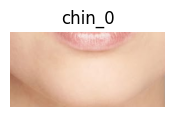

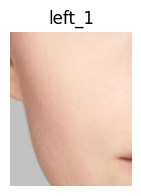

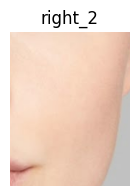

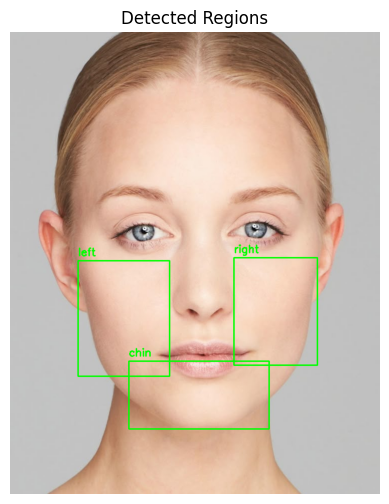

In [ ]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

# Load YOLOv8 model đã huấn luyện
model = YOLO("runs/detect/cheek_chin_yolov8_skin/weights/best.pt")

# Đường dẫn ảnh đầu vào
img_path = "D:/KLTN/KLTN_SKINTONE/public\data_skintone\light\1df04311e8b9a95b85d2fcdb5287236b.jpg"
results = model(img_path, conf=0.5)[0]

# Đọc ảnh gốc
image = cv2.imread(img_path)
image_draw = image.copy()

# Tạo thư mục lưu ảnh crop nếu chưa có
os.makedirs("output_crop", exist_ok=True)

# Duyệt qua từng box
for i, box in enumerate(results.boxes.xyxy):
    cls_id = int(results.boxes.cls[i])
    label = model.names[cls_id]  # VD: "left_cheek", "chin", "right_cheek"
    x1, y1, x2, y2 = map(int, box)
    crop = image[y1:y2, x1:x2]

    # Lưu ảnh crop
    output_path = f"output_crop/{label}_{i}.jpg"
    cv2.imwrite(output_path, crop)

    # Hiển thị ảnh crop
    plt.figure(figsize=(2, 2))
    plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
    plt.title(f"{label}_{i}")
    plt.axis('off')
    plt.show()

    # Vẽ khung lên ảnh gốc
    cv2.rectangle(image_draw, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image_draw, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Hiển thị ảnh gốc có khung
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.title("Detected Regions")
plt.axis('off')
plt.show()



image 1/1 D:\KLTN\KLTN_SKINTONE\public\data_skintone\dark\augmented_rotation4_image_2561.jpg: 640x640 1 chin, 2 lefts, 8.2ms
Speed: 3.5ms preprocess, 8.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


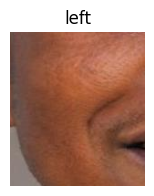

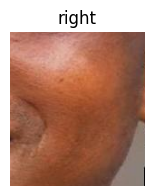

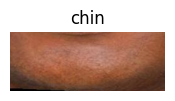

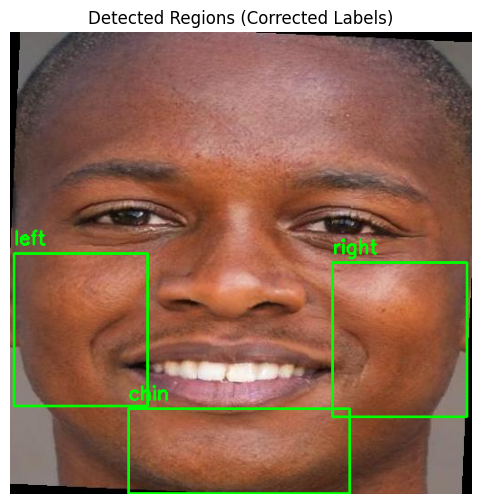

In [75]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

# Load model
model = YOLO("runs/detect/cheek_chin_yolov8_skin/weights/best.pt")

# Ảnh đầu vào
img_path = "D:/KLTN/KLTN_SKINTONE/public/data_skintone/dark/augmented_rotation4_image_2561.jpg"
results = model(img_path, conf=0.1)[0]

# Đọc ảnh gốc
image = cv2.imread(img_path)
image_draw = image.copy()
h, w, _ = image.shape

# Tạo thư mục lưu ảnh crop
os.makedirs("output_crop", exist_ok=True)

# Tạo dict lưu vùng crop duy nhất
crop_dict = {}

for i, box in enumerate(results.boxes.xyxy):
    x1, y1, x2, y2 = map(int, box)
    cx = (x1 + x2) // 2  # Tâm theo trục X

    cls_id = int(results.boxes.cls[i])
    raw_label = model.names[cls_id]  # Nhãn gốc từ model

    # Sửa nhãn theo vị trí
    if raw_label in ["left", "right"]:  # Nếu là má
        label = "left" if cx < w // 2 else "right"
    elif raw_label == "chin":
        label = "chin"
    else:
        continue  # Bỏ qua nhãn khác

    if label in crop_dict:
        continue  # Chỉ lấy một vùng mỗi loại

    crop = image[y1:y2, x1:x2]
    crop_dict[label] = crop

    # Lưu ảnh crop
    output_path = f"output_crop/{label}.jpg"
    cv2.imwrite(output_path, crop)

    # Hiển thị vùng crop
    plt.figure(figsize=(2, 2))
    plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis('off')
    plt.show()

    # Vẽ khung
    cv2.rectangle(image_draw, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image_draw, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Hiển thị ảnh gốc với box
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.title("Detected Regions (Corrected Labels)")
plt.axis('off')
plt.show()



image 1/1 D:\KLTN\KLTN_SKINTONE\public\data_skintone\dark\augmented_rotation4_augmented_rotation3_augmented_rotation2_augmented_image_10545.jpg: 640x640 2 chins, 2 lefts, 11.1ms
Speed: 4.0ms preprocess, 11.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


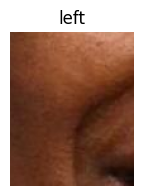

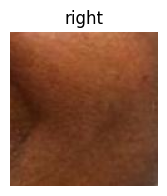

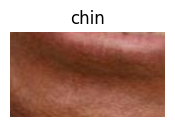

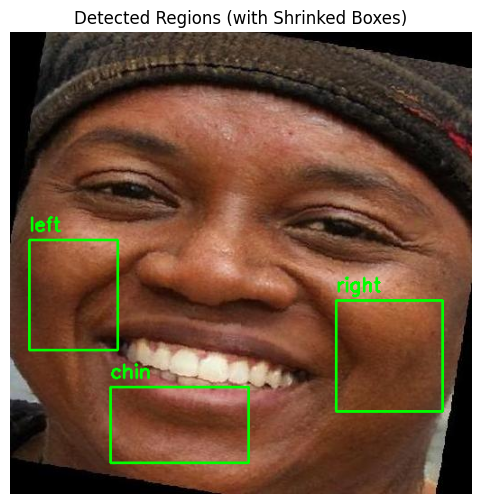

In [76]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

# Load YOLOv8 model
model = YOLO("runs/detect/cheek_chin_yolov8_skin/weights/best.pt")

# Ảnh đầu vào
img_path = "D:/KLTN/KLTN_SKINTONE/public/data_skintone/dark/augmented_rotation4_augmented_rotation3_augmented_rotation2_augmented_image_10545.jpg"
results = model(img_path, conf=0.1)[0]

# Đọc ảnh gốc
image = cv2.imread(img_path)
image_draw = image.copy()
h_img, w_img, _ = image.shape

# Thư mục lưu vùng crop
os.makedirs("output_crop", exist_ok=True)

# Dict lưu mỗi vùng một lần duy nhất
crop_dict = {}

# Tỉ lệ thu nhỏ hộp
shrink_ratio = 0.3

for i, box in enumerate(results.boxes.xyxy):
    x1, y1, x2, y2 = map(int, box)
    cx = (x1 + x2) // 2

    cls_id = int(results.boxes.cls[i])
    raw_label = model.names[cls_id]

    # Gán nhãn theo vị trí
    if raw_label in ["left", "right"]:
        label = "left" if cx < w_img // 2 else "right"
    elif raw_label == "chin":
        label = "chin"
    else:
        continue

    if label in crop_dict:
        continue

    # === THU NHỎ HỘP ===
    box_w = x2 - x1
    box_h = y2 - y1
    x1_s = max(int(x1 + shrink_ratio * box_w / 2), 0)
    y1_s = max(int(y1 + shrink_ratio * box_h / 2), 0)
    x2_s = min(int(x2 - shrink_ratio * box_w / 2), w_img)
    y2_s = min(int(y2 - shrink_ratio * box_h / 2), h_img)

    # Crop vùng đã thu nhỏ
    crop = image[y1_s:y2_s, x1_s:x2_s]
    crop_dict[label] = crop

    # Lưu ảnh crop
    output_path = f"output_crop/{label}.jpg"
    cv2.imwrite(output_path, crop)

    # Vẽ khung đã thu nhỏ lên ảnh
    cv2.rectangle(image_draw, (x1_s, y1_s), (x2_s, y2_s), (0, 255, 0), 2)
    cv2.putText(image_draw, label, (x1_s, y1_s - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Hiển thị vùng crop
for label, crop in crop_dict.items():
    plt.figure(figsize=(2, 2))
    plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis('off')
    plt.show()

# Hiển thị ảnh có bbox
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.title("Detected Regions (with Shrinked Boxes)")
plt.axis('off')
plt.show()



image 1/1 D:\KLTN\KLTN_SKINTONE\public\data_skintone\dark\augmented_rotation4_augmented_rotation3_augmented_rotation2_augmented_rotation1_49603874.jpg: 640x640 59 chins, 17 lefts, 224 rights, 10.1ms
Speed: 4.3ms preprocess, 10.1ms inference, 35.6ms postprocess per image at shape (1, 3, 640, 640)


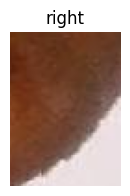

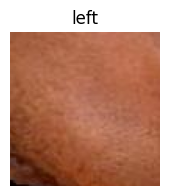

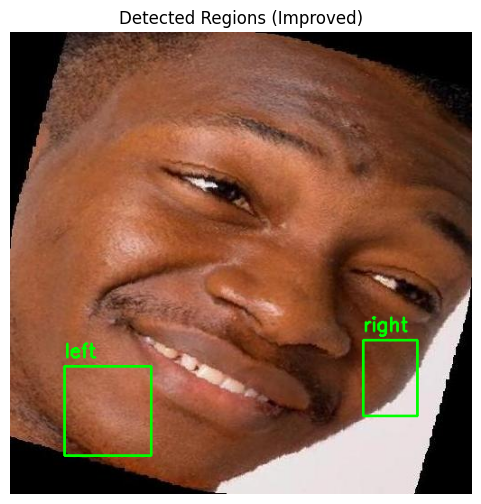

In [ ]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

# Load model
model = YOLO("runs/detect/cheek_chin_yolov8_skin/weights/best.pt")

# Input image
img_path = "D:/KLTN/KLTN_SKINTONE/public/data_skintone/dark/augmnted_rotation4_augmented_rotation3_augmented_rotation2_augmented_rotation1_49603874.jpge"
results = model(img_path, conf=0.0)[0]

# Read image
image = cv2.imread(img_path)
image_draw = image.copy()
h_img, w_img, _ = image.shape

os.makedirs("output_crop", exist_ok=True)

# Tỉ lệ thu nhỏ hộp
shrink_ratio = 0.3

# Lưu vùng crop tốt nhất cho mỗi nhãn
best_boxes = {}

for i, box in enumerate(results.boxes.xyxy):
    x1, y1, x2, y2 = map(int, box)
    conf = float(results.boxes.conf[i])
    cls_id = int(results.boxes.cls[i])
    raw_label = model.names[cls_id]
    cx = (x1 + x2) // 2

    # Gán nhãn theo vị trí
    if raw_label in ["left", "right"]:
        label = "left" if cx < w_img // 2 else "right"
    elif raw_label == "chin":
        label = "chin"
    else:
        continue

    # Kiểm tra nếu đã có box nào tốt hơn chưa
    if label not in best_boxes or conf > best_boxes[label]["conf"]:
        best_boxes[label] = {
            "conf": conf,
            "coords": (x1, y1, x2, y2)
        }

# Duyệt các nhãn để crop và hiển thị
crop_dict = {}

for label, box_data in best_boxes.items():
    x1, y1, x2, y2 = map(int, box_data["coords"])

    # Loại bỏ box quá nhỏ
    box_w = x2 - x1
    box_h = y2 - y1
    if box_w < 0.05 * w_img or box_h < 0.05 * h_img:
        continue

    # Thu nhỏ khung
    x1_s = max(int(x1 + shrink_ratio * box_w / 2), 0)
    y1_s = max(int(y1 + shrink_ratio * box_h / 2), 0)
    x2_s = min(int(x2 - shrink_ratio * box_w / 2), w_img)
    y2_s = min(int(y2 - shrink_ratio * box_h / 2), h_img)

    crop = image[y1_s:y2_s, x1_s:x2_s]
    crop_dict[label] = crop

    # Lưu
    cv2.imwrite(f"output_crop/{label}.jpg", crop)

    # Vẽ
    cv2.rectangle(image_draw, (x1_s, y1_s), (x2_s, y2_s), (0, 255, 0), 2)
    cv2.putText(image_draw, label, (x1_s, y1_s - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Hiển thị vùng crop
for label, crop in crop_dict.items():
    plt.figure(figsize=(2, 2))
    plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis('off')
    plt.show()

# Hiển thị ảnh gốc với khung
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.title("Detected Regions (Improved)")
plt.axis('off')
plt.show()



image 1/1 D:\KLTN\FINAL_SKINTONE\test4\f9978747e31efda95053a8bc100d9fdf.jpg: 640x640 1 chin, 1 left, 2 rights, 8.9ms
Speed: 3.5ms preprocess, 8.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


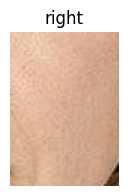

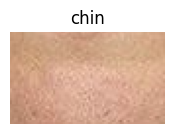

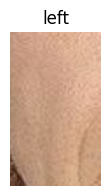

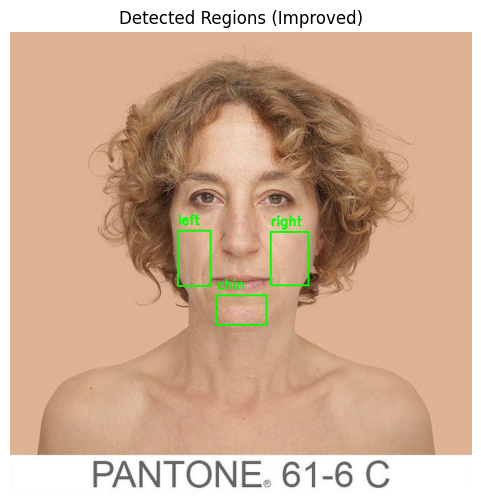

In [ ]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

# Load model
model = YOLO("runs/detect/cheek_chin_yolov8_skin/weights/best.pt")

# Input image
img_path = "D:\KLTN\FINAL_SKINTONE\public\data_skintone\light\0f375791fda4387ee0fa06a18934f735.jpg"
results = model(img_path, conf=0.5)[0]

# Read image
image = cv2.imread(img_path)
image_draw = image.copy()
h_img, w_img, _ = image.shape

os.makedirs("output_crop", exist_ok=True)

# Tỉ lệ thu nhỏ hộp
shrink_ratio = 0.3

# Lưu vùng crop tốt nhất cho mỗi nhãn
best_boxes = {}

for i, box in enumerate(results.boxes.xyxy):
    x1, y1, x2, y2 = map(int, box)
    conf = float(results.boxes.conf[i])
    cls_id = int(results.boxes.cls[i])
    raw_label = model.names[cls_id]
    cx = (x1 + x2) // 2

    # Gán nhãn theo vị trí
    if raw_label in ["left", "right"]:
        label = "left" if cx < w_img // 2 else "right"
    elif raw_label == "chin":
        label = "chin"
    else:
        continue

    # Kiểm tra nếu đã có box nào tốt hơn chưa
    if label not in best_boxes or conf > best_boxes[label]["conf"]:
        best_boxes[label] = {
            "conf": conf,
            "coords": (x1, y1, x2, y2)
        }

# Duyệt các nhãn để crop và hiển thị
crop_dict = {}

for label, box_data in best_boxes.items():
    x1, y1, x2, y2 = map(int, box_data["coords"])

    # Loại bỏ box quá nhỏ
    box_w = x2 - x1
    box_h = y2 - y1
    if box_w < 0.05 * w_img or box_h < 0.05 * h_img:
        continue

    # Thu nhỏ khung
    x1_s = max(int(x1 + shrink_ratio * box_w / 2), 0)
    y1_s = max(int(y1 + shrink_ratio * box_h / 2), 0)
    x2_s = min(int(x2 - shrink_ratio * box_w / 2), w_img)
    y2_s = min(int(y2 - shrink_ratio * box_h / 2), h_img)

    crop = image[y1_s:y2_s, x1_s:x2_s]
    crop_dict[label] = crop

    # Lưu
    cv2.imwrite(f"output_crop/{label}.jpg", crop)

    # Vẽ
    cv2.rectangle(image_draw, (x1_s, y1_s), (x2_s, y2_s), (0, 255, 0), 2)
    cv2.putText(image_draw, label, (x1_s, y1_s - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Hiển thị vùng crop
for label, crop in crop_dict.items():
    plt.figure(figsize=(2, 2))
    plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis('off')
    plt.show()

# Hiển thị ảnh gốc với khung
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.title("Detected Regions (Improved)")
plt.axis('off')
plt.show()



image 1/1 D:\KLTN\FINAL_SKINTONE\test4\7700f3735d44a302cd864a9aeb33e85d.jpg: 640x640 1 chin, 2 lefts, 9.2ms
Speed: 5.7ms preprocess, 9.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


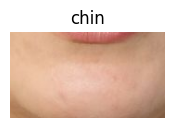

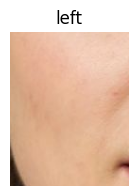

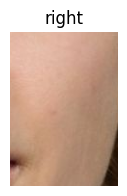

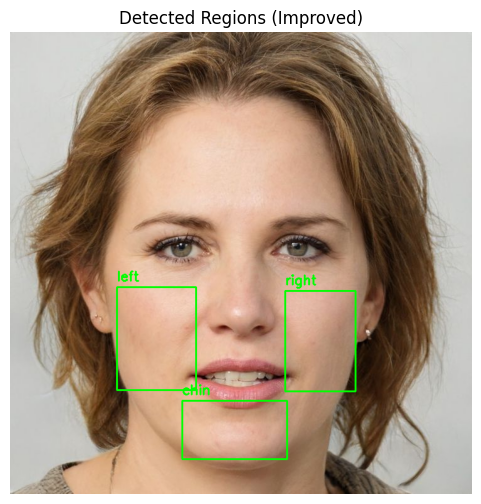

In [4]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

# Load model
model = YOLO("runs/detect/cheek_chin_yolov8_skin/weights/best.pt")

# Input image
img_path = "D:/KLTN/FINAL_SKINTONE/test4/7700f3735d44a302cd864a9aeb33e85d.jpg"
results = model(img_path, conf=0.3)[0]

# Read image
image = cv2.imread(img_path)
image_draw = image.copy()
h_img, w_img, _ = image.shape

os.makedirs("output_crop", exist_ok=True)

# Tỉ lệ thu nhỏ hộp
shrink_ratio = 0.2

# Lưu vùng crop tốt nhất cho mỗi nhãn
best_boxes = {}

for i, box in enumerate(results.boxes.xyxy):
    x1, y1, x2, y2 = map(int, box)
    conf = float(results.boxes.conf[i])
    cls_id = int(results.boxes.cls[i])
    raw_label = model.names[cls_id]
    cx = (x1 + x2) // 2

    # Gán nhãn theo vị trí
    if raw_label in ["left", "right"]:
        label = "left" if cx < w_img // 2 else "right"
    elif raw_label == "chin":
        label = "chin"
    else:
        continue

    # Kiểm tra nếu đã có box nào tốt hơn chưa
    if label not in best_boxes or conf > best_boxes[label]["conf"]:
        best_boxes[label] = {
            "conf": conf,
            "coords": (x1, y1, x2, y2)
        }

# Duyệt các nhãn để crop và hiển thị
crop_dict = {}

for label, box_data in best_boxes.items():
    x1, y1, x2, y2 = map(int, box_data["coords"])

    # Loại bỏ box quá nhỏ
    box_w = x2 - x1
    box_h = y2 - y1
    if box_w < 0.05 * w_img or box_h < 0.05 * h_img:
        continue

    # Thu nhỏ khung
    x1_s = max(int(x1 + shrink_ratio * box_w / 2), 0)
    y1_s = max(int(y1 + shrink_ratio * box_h / 2), 0)
    x2_s = min(int(x2 - shrink_ratio * box_w / 2), w_img)
    y2_s = min(int(y2 - shrink_ratio * box_h / 2), h_img)

    crop = image[y1_s:y2_s, x1_s:x2_s]
    crop_dict[label] = crop

    # Lưu
    cv2.imwrite(f"output_crop/{label}.jpg", crop)

    # Vẽ
    cv2.rectangle(image_draw, (x1_s, y1_s), (x2_s, y2_s), (0, 255, 0), 2)
    cv2.putText(image_draw, label, (x1_s, y1_s - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Hiển thị vùng crop
for label, crop in crop_dict.items():
    plt.figure(figsize=(2, 2))
    plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis('off')
    plt.show()

# Hiển thị ảnh gốc với khung
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.title("Detected Regions (Improved)")
plt.axis('off')
plt.show()


In [105]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

# Load YOLOv8 model đã huấn luyện
model = YOLO("runs/detect/cheek_chin_yolov8_skin/weights/best.pt")

# Thư mục chứa ảnh đầu vào
input_folder = "D:/KLTN/FINAL_SKINTONE/test4"
output_root = "output_crop_batch"
os.makedirs(output_root, exist_ok=True)

# Tỉ lệ thu nhỏ hộp
shrink_ratio = 0.2

# Lặp qua từng ảnh trong thư mục
for filename in os.listdir(input_folder):
    if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue

    img_path = os.path.join(input_folder, filename)
    image = cv2.imread(img_path)
    if image is None:
        print(f"Không đọc được ảnh: {img_path}")
        continue

    image_draw = image.copy()
    h_img, w_img, _ = image.shape
    results = model(image, conf=0.3)[0]

    # Lưu vùng crop tốt nhất cho mỗi nhãn
    best_boxes = {}

    for i, box in enumerate(results.boxes.xyxy):
        x1, y1, x2, y2 = map(int, box)
        conf = float(results.boxes.conf[i])
        cls_id = int(results.boxes.cls[i])
        raw_label = model.names[cls_id]
        cx = (x1 + x2) // 2

        # Gán nhãn theo vị trí
        if raw_label in ["left", "right"]:
            label = "left" if cx < w_img // 2 else "right"
        elif raw_label == "chin":
            label = "chin"
        else:
            continue

        # Giữ box tốt nhất theo độ tự tin
        if label not in best_boxes or conf > best_boxes[label]["conf"]:
            best_boxes[label] = {
                "conf": conf,
                "coords": (x1, y1, x2, y2)
            }

    # Duyệt và crop theo nhãn
    for label, box_data in best_boxes.items():
        x1, y1, x2, y2 = map(int, box_data["coords"])
        box_w = x2 - x1
        box_h = y2 - y1

        if box_w < 0.05 * w_img or box_h < 0.05 * h_img:
            continue

        x1_s = max(int(x1 + shrink_ratio * box_w / 2), 0)
        y1_s = max(int(y1 + shrink_ratio * box_h / 2), 0)
        x2_s = min(int(x2 - shrink_ratio * box_w / 2), w_img)
        y2_s = min(int(y2 - shrink_ratio * box_h / 2), h_img)

        crop = image[y1_s:y2_s, x1_s:x2_s]

        # Tạo thư mục con theo nhãn
        save_dir = os.path.join(output_root, label)
        os.makedirs(save_dir, exist_ok=True)

        # Lưu ảnh
        save_name = os.path.splitext(filename)[0] + ".jpg"
        save_path = os.path.join(save_dir, save_name)
        cv2.imwrite(save_path, crop)

    print(f"Đã xử lý: {filename}")



0: 640x544 1 chin, 1 left, 1 right, 32.6ms
Speed: 3.8ms preprocess, 32.6ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 544)
Đã xử lý: 0c4e7473e7e82503bf1dc2d2328112a6.jpg

0: 640x480 1 chin, 1 left, 1 right, 63.7ms
Speed: 4.5ms preprocess, 63.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)
Đã xử lý: 223ce0cd26dec68747477fba9bf01a97.jpg

0: 640x640 1 chin, 1 left, 2 rights, 16.4ms
Speed: 6.7ms preprocess, 16.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Đã xử lý: 28428ec47d3ce47e4fb2b2726d7a2293.jpg

0: 640x512 1 chin, 1 left, 1 right, 57.5ms
Speed: 4.2ms preprocess, 57.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 512)
Đã xử lý: 359a40ffdbf62134c69151d3ec304c99.jpg

0: 640x640 1 chin, 2 lefts, 1 right, 23.2ms
Speed: 6.4ms preprocess, 23.2ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)
Đã xử lý: 4fa62d5d64dd7772277d1336ca4b4618.jpg

0: 640x512 1 chin, 1 left, 1 right, 11.5ms
Speed: 2.8ms p


image 1/1 D:\KLTN\FINAL_SKINTONE\pre_processing\face_yolo\light\4bee85c54e1510f9a7e75b384666abbb.jpg: 640x640 1 chin, 2 lefts, 1 right, 16.9ms
Speed: 3.4ms preprocess, 16.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


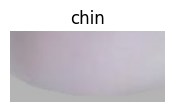

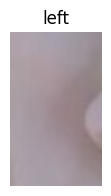

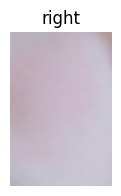

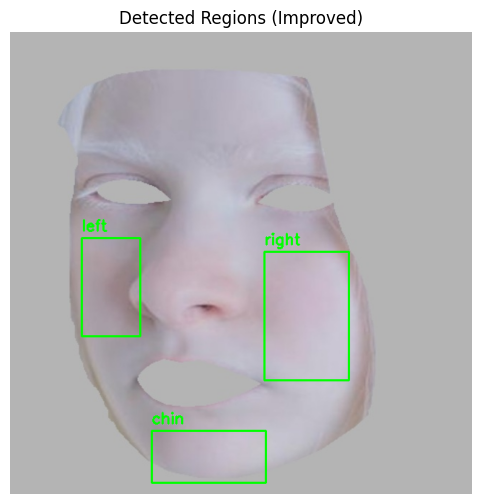

In [24]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

# Load YOLOv8 model
model = YOLO("runs/detect/cheek_chin_yolov8_skin/weights/best.pt")

# Input image path
img_path = "D:/KLTN/FINAL_SKINTONE/pre_processing/face_yolo/light/4bee85c54e1510f9a7e75b384666abbb.jpg"

# Detect with confidence threshold
results = model(img_path, conf=0.1)[0]

# Load image with OpenCV
image = cv2.imread(img_path)
image_draw = image.copy()
h_img, w_img, _ = image.shape

# Output folder
os.makedirs("output_crop", exist_ok=True)

# Shrink ratio for cropping boxes
shrink_ratio = 0.3

# Store best boxes per label
best_boxes = {}

# Loop through detected boxes
for i, box in enumerate(results.boxes.xyxy):
    x1, y1, x2, y2 = map(int, box)
    conf = float(results.boxes.conf[i])
    cls_id = int(results.boxes.cls[i])
    raw_label = model.names[cls_id]
    cx = (x1 + x2) // 2

    # Assign label (left/right/chin)
    if raw_label in ["left", "right"]:
        label = "left" if cx < w_img // 2 else "right"
    elif raw_label == "chin":
        label = "chin"
    else:
        continue

    # Keep highest confidence box per label
    if label not in best_boxes or conf > best_boxes[label]["conf"]:
        best_boxes[label] = {
            "conf": conf,
            "coords": (x1, y1, x2, y2)
        }

# Crop and draw boxes
crop_dict = {}

for label, box_data in best_boxes.items():
    x1, y1, x2, y2 = map(int, box_data["coords"])

    # === Adjust chin box to move downward ===
    if label == "chin":
        chin_shift = int(0.04 * h_img)  # shift down 5% of image height
        y1 = min(y1 + chin_shift, h_img)
        y2 = min(y2 + chin_shift, h_img)

    # Skip small boxes
    box_w = x2 - x1
    box_h = y2 - y1
    if box_w < 0.05 * w_img or box_h < 0.05 * h_img:
        continue

    # Apply shrink
    x1_s = max(int(x1 + shrink_ratio * box_w / 2), 0)
    y1_s = max(int(y1 + shrink_ratio * box_h / 2), 0)
    x2_s = min(int(x2 - shrink_ratio * box_w / 2), w_img)
    y2_s = min(int(y2 - shrink_ratio * box_h / 2), h_img)

    # Crop the region
    crop = image[y1_s:y2_s, x1_s:x2_s]
    crop_dict[label] = crop

    # Save cropped region
    cv2.imwrite(f"output_crop/{label}.jpg", crop)

    # Draw rectangle on original image
    cv2.rectangle(image_draw, (x1_s, y1_s), (x2_s, y2_s), (0, 255, 0), 2)
    cv2.putText(image_draw, label, (x1_s, y1_s - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Show each cropped region
for label, crop in crop_dict.items():
    plt.figure(figsize=(2, 2))
    plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis('off')
    plt.show()

# Show full image with drawn boxes
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.title("Detected Regions (Improved)")
plt.axis('off')
plt.show()
